# 식약처 위해도 예측모형 performance metrics

### 식약처의 무작위추출결과(예측값, 확률, 실제값)를 바탕으로 다양한 머신러닝의 평가지표(perfomance metrics)를 도출
### 수입식품자료가 극심한 불균형데이터형태로 다양한 평가지표로 BMT를 하여야 함

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings(action='ignore') 
# Imports
import pandas as pd
import numpy as np
import seaborn as sns#; sns.set()
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

# 1. 2021. 4분기 및 2022.1월 데이터 확보
### 식품, 농축수산물을 구분하지 않고 22년 1월 자료를 기준으로 평가지표를 도출

In [2]:
df1 = pd.read_excel('../data/20220310_조상구_무작위추출결과(21년 4분기).xlsx')
df2 = pd.read_excel('../data/20220310_조상구_수입실적 기본정보(21년 4분기).xlsx')

In [3]:
df1.to_pickle('../data/20220310_조상구_무작위추출결과(21년 4분기).pkl')
df2.to_pickle('../data/../data/20220310_조상구_수입실적 기본정보(21년 4분기).pkl')

In [2]:
df1 = pd.read_pickle('../data/20220310_조상구_무작위추출결과(21년 4분기).pkl')
df2 = pd.read_pickle('../data/20220310_조상구_수입실적 기본정보(21년 4분기).pkl')

In [3]:
df1.head()
df1.shape

df2.iloc[:, 40:].head()
df2.shape
df2.columns

,RCNO,LAST_HZD_PRED_SCORE,HZD_RANDOM_TRGET_YN,REGISTER_ID,REGIST_DTM,UPDUSR_ID,UPDT_DTM,REVISN_YN
0,202100642827,0.524588,0,88888888,2021/10/12 11:34:55,88888888,2021/10/12 11:34:55,0
1,202100623031,0.260869,0,88888888,2021/10/01 11:39:55,88888888,2021/10/01 11:39:55,0
2,202100637868,0.498317,0,88888888,2021/10/08 10:35:56,88888888,2021/10/08 10:35:56,0
3,202100641842,0.134130,0,88888888,2021/10/12 10:33:54,88888888,2021/10/12 10:33:54,0
4,202100641273,0.859758,0,88888888,2021/10/12 10:03:55,88888888,2021/10/12 10:03:55,0


(211305, 8)

,진균수시험대상,방사선조사식품,판정조치 구분코드,판정결과,행정조치사유코드1,행정조치사유1,행정조치사유코드2,행정조치사유2,통보내용,부적합 최종처리 결과코드,...,부적합조치계획,부족합조치예정일,통관진행상태,검사종류 대분류,검사종류 대분류명,최종결과 일련번호,검사코드,선별,검사종류,비고
0,N,N,5,자진 취하,NaN,NaN,NaN,NaN,해외제조업소(원산지)를 수입화주의 실수로 오기입하여 자진취하 후 재신고하여 정밀검사...,NaN,...,NaN,NaN,NaN,1,서류,1,180,자동,서류(동일사 동일식품등),NaN
1,N,N,5,자진 취하,NaN,NaN,NaN,NaN,해외제조업소(원산지)를 수입화주의 실수로 오기입하여 자진취하 후 재신고하여 정밀검사...,NaN,...,NaN,NaN,NaN,1,서류,2,180,자동,서류(동일사 동일식품등),NaN
2,N,N,5,자진 취하,NaN,NaN,NaN,NaN,해외제조업소(원산지)를 수입화주의 실수로 오기입하여 자진취하 후 재신고하여 정밀검사...,NaN,...,NaN,NaN,NaN,1,서류,3,180,자동,서류(동일사 동일식품등),NaN
3,N,N,5,자진 취하,NaN,NaN,NaN,NaN,해외제조업소(원산지)를 수입화주의 실수로 오기입하여 자진취하 후 재신고하여 정밀검사...,NaN,...,NaN,NaN,NaN,1,서류,4,180,자동,서류(동일사 동일식품등),NaN
4,N,N,5,자진 취하,NaN,NaN,NaN,NaN,해외제조업소(원산지)를 수입화주의 실수로 오기입하여 자진취하 후 재신고하여 정밀검사...,NaN,...,NaN,NaN,NaN,1,서류,5,180,자동,서류(동일사 동일식품등),NaN


(290597, 65)

Index(['접수번호', '제품구분', '접수일', '처리일', '신고시기', '품목코드', '품목명', '제품명', '제품명(한글)',
       '용도코드', '용도명', '선적일자', '제조국(원산지)코드', '제조국(원산지)', '수출국코드', '수출국',
       '순중량(Kg)', '과세가격', '과세가격($/Kg)', '유기식품 여부', '식품조사처리 여부', '영유아섭취대상',
       '주문자상표부착', '고열량.저영양', '유전자변형식품', '서류검사또는환경검사생략대상여부', '수입화주 상호',
       '대행업자 사업자등록번호', '해외제조업소 등록번호', '해외제조업소명', '해외제조업소 지역', '검사명령제도 해당여부',
       '국내도착항 코드', '국내도착항명', '입항일', '선적항명', '선적일', '반입일자', '신속검사대상', '가온보존대상',
       '진균수시험대상', '방사선조사식품', '판정조치 구분코드', '판정결과', '행정조치사유코드1', '행정조치사유1',
       '행정조치사유코드2', '행정조치사유2', '통보내용', '부적합 최종처리 결과코드', '부적합최종처리결과',
       '부적합 최종처리 결과 일시', '부적합 최종처리 근거 설명', '송문수취일', '등기번호', '부적합조치계획',
       '부족합조치예정일', '통관진행상태', '검사종류 대분류', '검사종류 대분류명', '최종결과 일련번호', '검사코드',
       '선별', '검사종류', '비고'],
      dtype='object')

In [4]:
df2['판정결과'].value_counts()

적합       289118
자진 취하       793
부적합         611
반려           75
Name: 판정결과, dtype: int64

In [5]:
df1['REVISN_YN'].value_counts()

0    208332
1      2973
Name: REVISN_YN, dtype: int64

In [6]:
data = df2[['접수번호', '제품구분', '판정결과']].merge(df1[['RCNO', 'REVISN_YN']], left_on ='접수번호', right_on = 'RCNO')
data

,접수번호,제품구분,판정결과,RCNO,REVISN_YN
0,202100596265,가공식품,적합,202100596265,0
1,202100596265,가공식품,적합,202100596265,0
2,202100577827,기구또는용기.포장,적합,202100577827,0
3,202100577827,기구또는용기.포장,적합,202100577827,0
4,202100577827,기구또는용기.포장,적합,202100577827,0
...,...,...,...,...,...
289685,202100744648,가공식품,적합,202100744648,0
289686,202100745087,농.임산물,적합,202100745087,0
289687,202100745160,농.임산물,적합,202100745160,0
289688,202100745372,가공식품,적합,202100745372,1


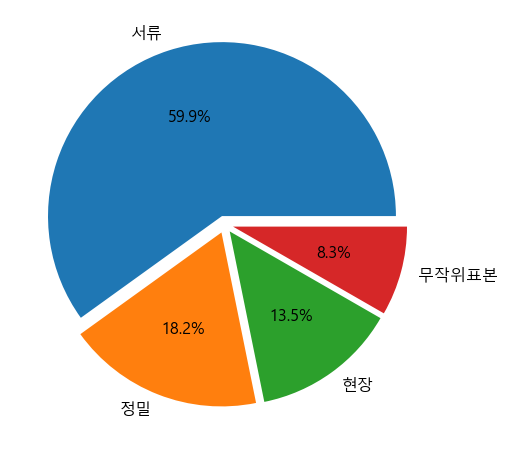

In [7]:
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
explode = [0.05, 0.05, 0.05, 0.05]
ax = plt.pie(df2['검사종류 대분류명'].value_counts(), 
             labels=df2['검사종류 대분류명'].value_counts().index, 
             textprops={'fontsize': 16},
             autopct='%.1f%%', explode=explode)

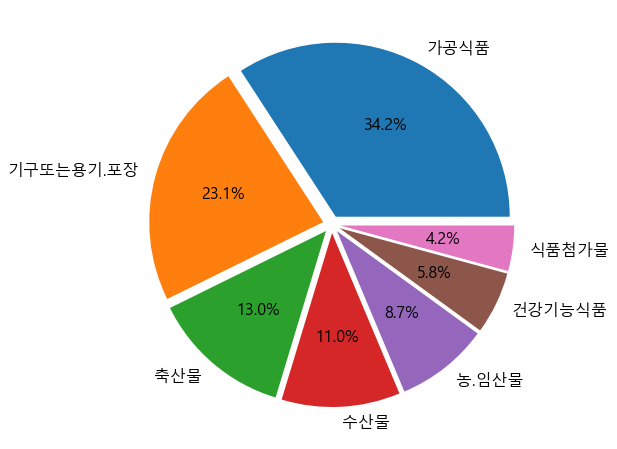

In [8]:
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
explode = [0.05]*len(df2['제품구분'].value_counts())
ax = plt.pie(df2['제품구분'].value_counts(), 
             labels=df2['제품구분'].value_counts().index, 
             textprops={'fontsize': 16},
             autopct='%.1f%%', explode=explode)

### 품목유형 무작위 위해 예측결과에 반영하기

In [9]:
df1['RCNO'].nunique()
df2 = df2[['접수번호', '제품구분', '검사종류 대분류명', '판정결과']].drop_duplicates(['접수번호'], keep='first')
df2['접수번호'].nunique()

211305

211531

In [10]:
df1= df1.merge(df2, left_on = 'RCNO', right_on = '접수번호', how = 'left')
df1['RCNO'].nunique()

211305

In [11]:
df1['RCNO'].isnull().sum()

0

In [12]:
df1.제품구분.value_counts()

가공식품         83971
기구또는용기.포장    39291
축산물          30972
수산물          24558
농.임산물        18036
식품첨가물        10526
건강기능식품        3715
Name: 제품구분, dtype: int64

In [13]:
df1.head(2)

,RCNO,LAST_HZD_PRED_SCORE,HZD_RANDOM_TRGET_YN,REGISTER_ID,REGIST_DTM,UPDUSR_ID,UPDT_DTM,REVISN_YN,접수번호,제품구분,검사종류 대분류명,판정결과
0,202100642827,0.524588,0,88888888,2021/10/12 11:34:55,88888888,2021/10/12 11:34:55,0,2.021006e+11,가공식품,서류,적합
1,202100623031,0.260869,0,88888888,2021/10/01 11:39:55,88888888,2021/10/01 11:39:55,0,2.021006e+11,가공식품,정밀,적합


In [14]:
df = df1.copy()
df.drop(['REGISTER_ID', 'UPDUSR_ID', 'REGIST_DTM', 'UPDT_DTM', 'REVISN_YN', '접수번호'], axis=1, inplace=True)
df.set_index('RCNO', inplace=True)
df.head()

,LAST_HZD_PRED_SCORE,HZD_RANDOM_TRGET_YN,제품구분,검사종류 대분류명,판정결과
RCNO,,,,,
202100642827,0.524588,0,가공식품,서류,적합
202100623031,0.260869,0,가공식품,정밀,적합
202100637868,0.498317,0,기구또는용기.포장,서류,적합
202100641842,0.134130,0,가공식품,서류,적합
202100641273,0.859758,0,가공식품,정밀,적합


In [15]:
df.columns = ['위험점수', '위험판정', '제품구분', '검사종류', '판정결과']
df['위험점수'] = round(df['위험점수'], 2)
df.index.name ='접수번호'

df.head()

df.위험점수.max()

,위험점수,위험판정,제품구분,검사종류,판정결과
접수번호,,,,,
202100642827,0.52,0,가공식품,서류,적합
202100623031,0.26,0,가공식품,정밀,적합
202100637868,0.50,0,기구또는용기.포장,서류,적합
202100641842,0.13,0,가공식품,서류,적합
202100641273,0.86,0,가공식품,정밀,적합


86.61

In [16]:
df['판정결과'].value_counts()

적합     210753
부적합       316
Name: 판정결과, dtype: int64

In [17]:
df['검사종류'].value_counts()

서류       140898
현장        33278
정밀        26746
무작위표본     10147
Name: 검사종류, dtype: int64

In [18]:
sf = df.groupby(['제품구분', '검사종류'])['위험점수'].count().unstack()
sf['r_ttl'] = sf.sum(1)
sf.loc['c_ttl'] = sf.sum()

sf.style.background_gradient()

검사종류,무작위표본,서류,정밀,현장,r_ttl
제품구분,,,,,
가공식품,5779,62887,15083,222,83971
건강기능식품,383,2567,750,15,3715
기구또는용기.포장,223,35939,3031,98,39291
농.임산물,979,12276,2374,2407,18036
수산물,1052,11789,3211,8506,24558
식품첨가물,157,8604,1746,19,10526
축산물,1574,6836,551,22011,30972
c_ttl,10147,140898,26746,33278,211069


In [19]:
df['판정결과'] = df['판정결과'].replace({'적합':0, '부적합':1})
df.head()

,위험점수,위험판정,제품구분,검사종류,판정결과
접수번호,,,,,
202100642827,0.52,0,가공식품,서류,0.0
202100623031,0.26,0,가공식품,정밀,0.0
202100637868,0.50,0,기구또는용기.포장,서류,0.0
202100641842,0.13,0,가공식품,서류,0.0
202100641273,0.86,0,가공식품,정밀,0.0


In [20]:
data = df.groupby(['제품구분', '검사종류']).agg({'제품구분': 'count', '판정결과':'mean'}).unstack()
round(data, 3)

제품구분                        판정결과                   
검사종류      무작위표본     서류     정밀     현장  무작위표본   서류     정밀     현장
제품구분                                                          
가공식품       5779  62887  15083    222  0.004  0.0  0.009  0.014
건강기능식품      383   2567    750     15  0.008  0.0  0.035  0.000
기구또는용기.포장   223  35939   3031     98  0.018  0.0  0.020  0.000
농.임산물       979  12276   2374   2407  0.006  0.0  0.007  0.001
수산물        1052  11789   3211   8506  0.004  0.0  0.001  0.000
식품첨가물       157   8604   1746     19  0.006  0.0  0.001  0.000
축산물        1574   6836    551  22011  0.004  0.0  0.018  0.000

In [21]:
data = df.groupby(['제품구분', '검사종류'])['판정결과'].sum().unstack()
round(data,2)

검사종류,무작위표본,서류,정밀,현장
제품구분,,,,
가공식품,26.0,4.0,135.0,3.0
건강기능식품,3.0,0.0,26.0,0.0
기구또는용기.포장,4.0,0.0,61.0,0.0
농.임산물,6.0,0.0,17.0,2.0
수산물,4.0,0.0,4.0,0.0
식품첨가물,1.0,0.0,2.0,0.0
축산물,7.0,0.0,10.0,1.0


# 2. 무작위와 정밀검사결과만 selection

In [22]:
sf = df[(df['검사종류'] == '무작위표본') | (df['검사종류'] == '정밀')]
sf.sample(10, random_state=13)

,위험점수,위험판정,제품구분,검사종류,판정결과
접수번호,,,,,
202100617775,1.71,1,가공식품,무작위표본,0.0
202100790405,1.53,1,기구또는용기.포장,정밀,0.0
202100814434,0.94,0,가공식품,무작위표본,0.0
202100616840,2.02,1,가공식품,무작위표본,0.0
202100780202,0.18,0,농.임산물,정밀,0.0
202100731209,1.70,1,기구또는용기.포장,정밀,0.0
202100675387,0.02,0,수산물,정밀,0.0
202100731043,0.93,0,가공식품,정밀,0.0
202100632041,0.01,0,축산물,무작위표본,0.0


In [23]:
sf.shape
sf['검사종류'].value_counts()

(36893, 5)

정밀       26746
무작위표본    10147
Name: 검사종류, dtype: int64

### <font color='red'> 설명이 필요

In [25]:
sf[(sf['위험판정'] == 0) & (sf['검사종류'] == '무작위표본')]
case = len(sf[(sf['위험판정'] == 0) & (sf['검사종류'] == '무작위표본')])
print(f'위해판정 정상인데 무작위표본검사 한 경우 : {case}')

,위험점수,위험판정,제품구분,검사종류,판정결과
접수번호,,,,,
202100611240,0.22,0,가공식품,무작위표본,0.0
202100622907,1.06,0,농.임산물,무작위표본,0.0
202100729664,0.91,0,가공식품,무작위표본,0.0
202100718938,0.13,0,축산물,무작위표본,0.0
202100721761,0.32,0,가공식품,무작위표본,0.0
...,...,...,...,...,...
202100813150,0.22,0,가공식품,무작위표본,0.0
202100773018,0.45,0,농.임산물,무작위표본,0.0
202100795110,0.07,0,축산물,무작위표본,0.0


위해판정 정상인데 무작위표본검사 한 경우 : 2402


In [81]:
data = sf.groupby(['제품구분', '검사종류'])['판정결과'].mean().unstack()*100
data['부적합률'] = data.sum(1)
round(data, 2)

검사종류,무작위표본,정밀,부적합률
제품구분,,,
가공식품,0.45,0.90,1.34
건강기능식품,0.78,3.47,4.25
기구또는용기.포장,1.79,2.01,3.81
농.임산물,0.61,0.72,1.33
수산물,0.38,0.12,0.50
식품첨가물,0.64,0.11,0.75
축산물,0.44,1.81,2.26


# 가공식품만 Select

In [82]:
df = sf.copy()

In [83]:
df = df[df['제품구분'] == '가공식품']
df.head(2)
del df['제품구분']
df.head(2)

,위험점수,위험판정,제품구분,검사종류,판정결과
접수번호,,,,,
202100623031,0.26,0,가공식품,정밀,0.0
202100641273,0.86,0,가공식품,정밀,0.0


,위험점수,위험판정,검사종류,판정결과
접수번호,,,,
202100623031,0.26,0,정밀,0.0
202100641273,0.86,0,정밀,0.0


<AxesSubplot:xlabel='위험점수', ylabel='Density'>

위해도점수 최대값 26.11

위해도점수 최소값 0.0


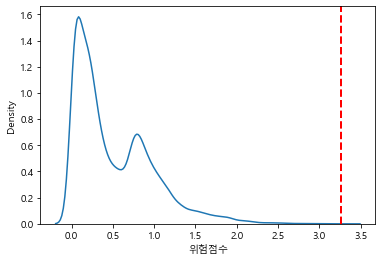

In [85]:
sns.kdeplot(np.log(1+ df['위험점수']))
plt.axvline(np.log(df['위험점수'].astype('float').max()), 0, 2, color='red', linestyle='--', linewidth=2)
#plt.axvline(np.log(df['위해도점수'].astype('float').min()), 0, 2, color='orange', linestyle='--', linewidth=2) # 음수라 로그가 의미 없음
print(f'위해도점수 최대값 {df.위험점수.max()}\n')
print(f'위해도점수 최소값 {df.위험점수.min()}')

Text(0.5, 1.0, '위해도점수별 정밀검사 여부')

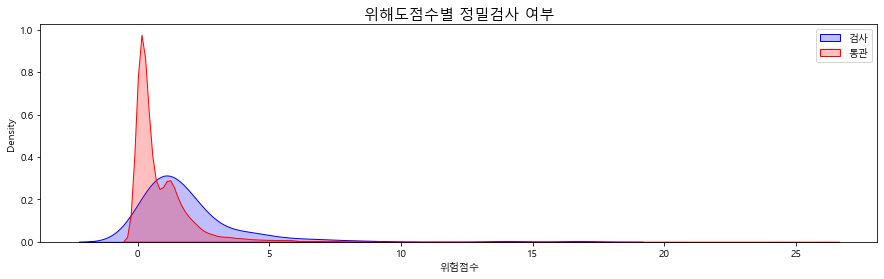

In [86]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['판정결과'] == 1), '위험점수'], color='blue', shade=True, label='검사')
ax=sns.kdeplot(df.loc[(df['판정결과'] == 0), '위험점수'], color='red', shade=True, label='통관')
plt.title('위해도점수별 정밀검사 여부', fontsize = 15)
plt.legend()

In [87]:
df.sort_values('위험점수').sample(10)
df[df['판정결과'] == 1]['위험점수'].min()
df[df['판정결과'] == 0]['위험점수'].max()

,위험점수,위험판정,검사종류,판정결과
접수번호,,,,
202100685601,1.16,1,정밀,0.0
202100634072,0.13,0,정밀,0.0
202100765595,0.26,0,정밀,0.0
202100798328,1.00,0,무작위표본,0.0
202100771464,1.10,1,무작위표본,0.0
202100728320,0.32,0,무작위표본,0.0
202100716882,0.76,0,정밀,0.0
202100757162,0.26,0,정밀,0.0
202100734828,0.85,0,정밀,0.0


0.14

26.11

## 식약처의 위해도 점수는 100점 만점임

## 위해도 점수는 변동
- 특정기간 동안의 상대적 점수에 따라 위해도를 변도하여 부여

In [88]:
df[(df['위험점수'] >= 0.73) & (df['위험점수'] <= 1.07)].sort_values('위험점수')

,위험점수,위험판정,검사종류,판정결과
접수번호,,,,
202100630941,0.73,0,정밀,0.0
202100738927,0.73,1,무작위표본,0.0
202100666985,0.73,0,무작위표본,0.0
202100633433,0.73,0,정밀,0.0
202100638584,0.73,0,정밀,0.0
202100698470,0.73,0,무작위표본,0.0
202100631491,0.73,0,정밀,0.0
202100754232,0.73,0,정밀,0.0
202100796371,0.73,0,정밀,0.0


<AxesSubplot:ylabel='Frequency'>

0.03     1218
0.02      651
0.04      536
0.26      486
0.06      477
         ... 
11.90       1
6.46        1
10.63       1
6.97        1
5.91        1
Name: 위험점수, Length: 726, dtype: int64

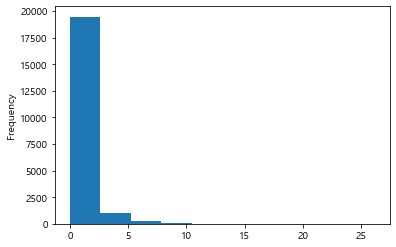

In [89]:
df['위험점수'].astype('float').plot(kind='hist')
df['위험점수'].astype('float').value_counts(ascending=False)

In [90]:
df['정상점수'] = 100 - df['위험점수']
df['정상점수'] = df['정상점수']/100
df['위험점수'] = df['위험점수']/100
df.head()

,위험점수,위험판정,검사종류,판정결과,정상점수
접수번호,,,,,
202100623031,0.0026,0,정밀,0.0,0.9974
202100641273,0.0086,0,정밀,0.0,0.9914
202100612533,0.0109,1,정밀,0.0,0.9891
202100611240,0.0022,0,무작위표본,0.0,0.9978
202100633390,0.0013,0,정밀,0.0,0.9987


# A. Threshold Metrics
### Confusion matrix

In [92]:
y_pred = df.위험판정
y_true = df['판정결과']
y_proba = np.c_[df.정상점수, df.위험점수]

In [93]:
y_proba

array([[0.9974, 0.0026],
       [0.9914, 0.0086],
       [0.9891, 0.0109],
       ...,
       [0.9974, 0.0026],
       [0.9925, 0.0075],
       [0.9962, 0.0038]])

In [94]:
from sklearn.metrics import confusion_matrix, classification_report

array([[13832,  6869],
       [   60,   101]], dtype=int64)

<AxesSubplot:>

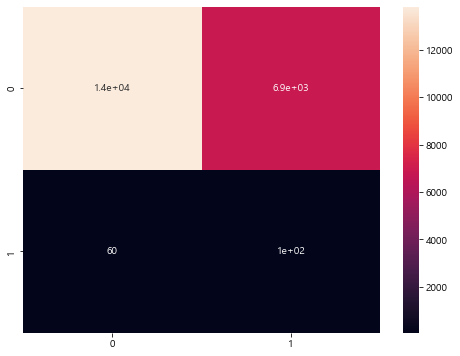

In [95]:
plt.rcParams["figure.figsize"] = (8,6)
confusion_matrix(y_true, y_pred)
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True)

In [96]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.67      0.80     20701
         1.0       0.01      0.63      0.03       161

    accuracy                           0.67     20862
   macro avg       0.51      0.65      0.41     20862
weighted avg       0.99      0.67      0.79     20862



# B. Ranking Metrics

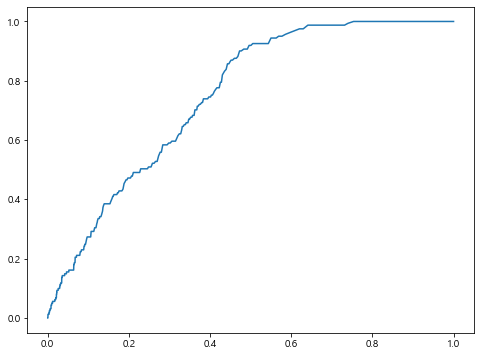

In [97]:
from sklearn import metrics 
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_proba[:, 1])
plt.plot(fpr, tpr)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

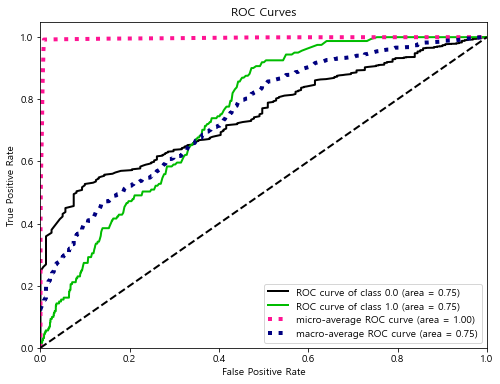

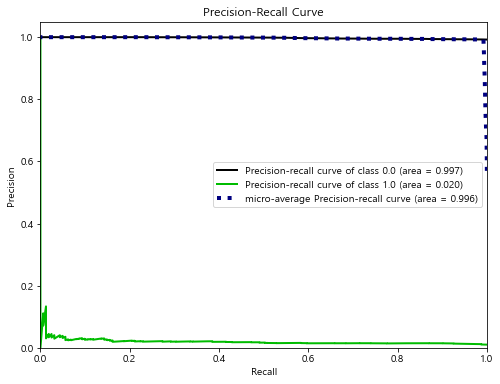

In [98]:
import scikitplot as skplt 
skplt.metrics.plot_roc(y_true, y_proba)
skplt.metrics.plot_precision_recall(y_true, y_proba)

In [99]:
from sklearn.metrics import precision_recall_curve

def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

precisions, recalls, thresholds = precision_recall_curve(y_true, y_proba[:, 1])
scores = [np.sum(to_labels(y_proba[:, 1], t))/len(y_proba[:, 1]) for t in thresholds]

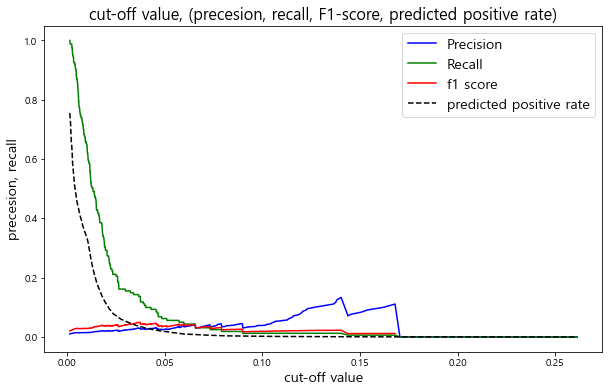

In [100]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
    plt.rcParams["figure.figsize"] = (10,6)
    plt.rcParams['font.family']='Malgun Gothic' # 한글폰트
    plt.title('cut-off value, (precesion, recall, F1-score, predicted positive rate)', fontsize='16') 
    plt.plot(thresholds, precisions[:-1], 'b-', label='Precision') # 판사
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall') # 검사
    plt.plot(thresholds, (2*precisions[:-1]*recalls[:-1])/(precisions[:-1] +recalls[:-1]), 
             'r-', label='f1 score') # 변호사
    plt.plot(thresholds, scores, 'k--', label='predicted positive rate') # q-ratio
    plt.ylabel('precesion, recall', fontsize='14') 
    plt.xlabel('cut-off value', fontsize='14') 
    plt.legend(loc='best', fontsize='14') 
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

# C Probablistic Metrics

### <font color='blue'> Performance Metrics for Imbalanced 

## Cohen’s kappa
The kappa score (see docstring) is a number between -1 and 1. Scores above .8 are generally considered good agreement; zero or lower means no agreement (practically random labels).

In [101]:
metrics.cohen_kappa_score(y_true, y_pred)

0.013443552339256426

## Balanced_accuracy_score
The balanced accuracy in binary and multiclass classification problems to deal with imbalanced datasets. It is defined as the average of recall obtained on each class.
The best value is 1 and the worst value is 0 when adjusted=False.

In [102]:
metrics.balanced_accuracy_score(y_true, y_pred)

0.6477547368462111

## Matthews correlation coefficient
The matthews_corrcoef function computes the Matthew’s correlation coef
“The Matthews correlation coefficient is used in machine learning as a measure of the quality of binary (two-class) classifications. It takes into account true and false positives and negatives and is generally regarded as a balanced measure which can be used even if the classes are of very different sizes. The MCC is in essence a correlation coefficient value between -1 and +1. A coefficient of +1 represents a perfect prediction, 0 an average random prediction and -1 an inverse prediction. The statistic is also known as the phi coefficient.”

In [103]:
metrics.matthews_corrcoef(y_true, y_pred)

0.054825327263286094

## f1-score가 최대인 threshold

In [104]:
from sklearn.metrics import f1_score
scores = [f1_score(y_true, to_labels(y_proba[:, 1], t)) for t in thresholds]
ix = np.argmax(scores)
print(f'Threshold(분류임계값)={thresholds[ix]:.3f}, at Maximum F-measure={scores[ix]:.3f}')

Threshold(분류임계값)=0.037, at Maximum F-measure=0.050


(array([1.9475e+04, 1.0450e+03, 2.5200e+02, 4.7000e+01, 2.4000e+01,
        9.0000e+00, 4.0000e+00, 4.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([0.     , 0.02611, 0.05222, 0.07833, 0.10444, 0.13055, 0.15666,
        0.18277, 0.20888, 0.23499, 0.2611 ]),
 <BarContainer object of 10 artists>)

(array([2.0000e+00, 0.0000e+00, 4.0000e+00, 4.0000e+00, 9.0000e+00,
        2.4000e+01, 4.7000e+01, 2.5200e+02, 1.0450e+03, 1.9475e+04]),
 array([0.7389 , 0.76501, 0.79112, 0.81723, 0.84334, 0.86945, 0.89556,
        0.92167, 0.94778, 0.97389, 1.     ]),
 <BarContainer object of 10 artists>)

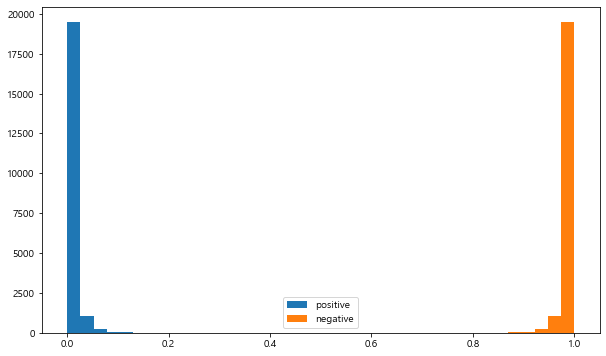

In [105]:
import matplotlib.cm as cm
plt.hist(y_proba[:, 1], label='positive')
plt.hist(y_proba[:, 0], label='negative')
plt.legend()

## Brier_score

In [106]:
from sklearn.metrics import brier_score_loss
brier_score_loss(y_true, y_proba[:, 1])

0.007670204277633976

## Lift curve, cumulative gain curve

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

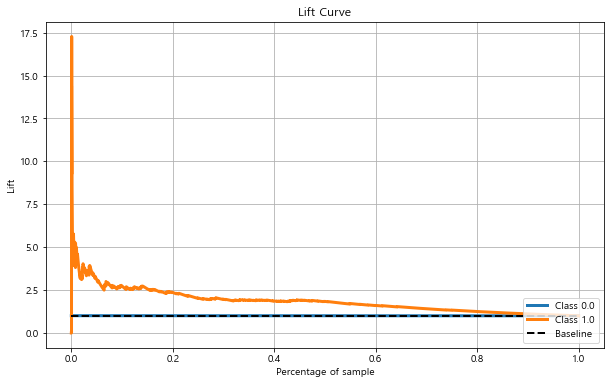

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

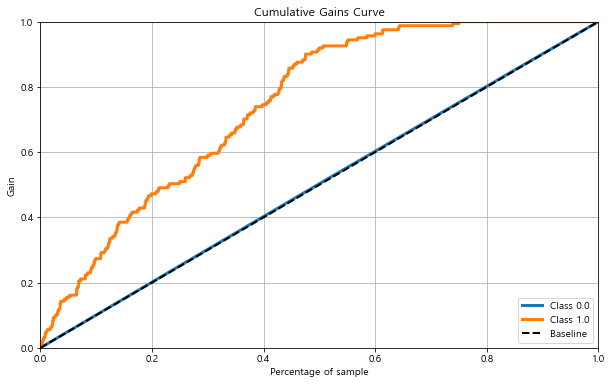

In [110]:
skplt.metrics.plot_lift_curve(y_true, y_proba); plt.show()
skplt.metrics.plot_cumulative_gain(y_true, y_proba)

## Kolmogorov-Smirnov Test

<AxesSubplot:title={'center':'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

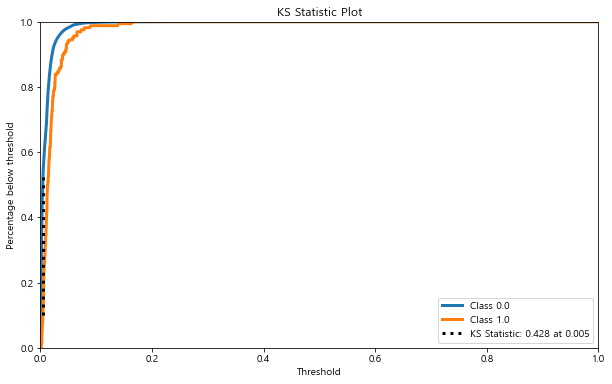

In [111]:
skplt.metrics.plot_ks_statistic(y_true, y_proba)

### **Probability calibration**
When performing classification you often want not only to predict the class label, but also obtain a probability of the respective label. This probability gives you some kind of confidence on the prediction.
- 식약처 위해도 예측모형의 확률구간은 신뢰적이지 못함(Why? 아래 그림 X축의 '0 ~ 0.1'구간에서 위해도 예측확률이나 그 위의 구간이나 실제 부적합(정밀검사)의 비율이 동일

<AxesSubplot:title={'center':'Calibration plots (Reliability Curves)'}, xlabel='Mean predicted value', ylabel='Fraction of positives'>

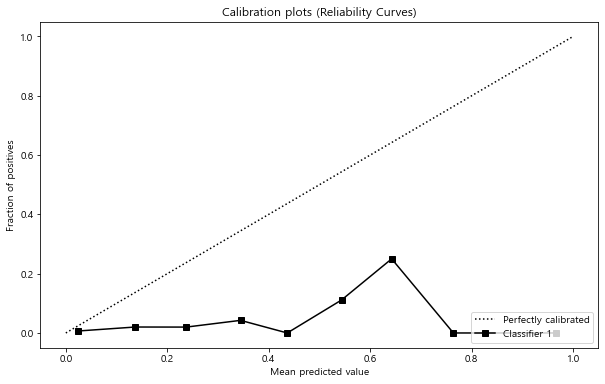

In [112]:
skplt.metrics.plot_calibration_curve(y_true, [y_proba])

# 백분위수 (Decile) 분석

In [114]:
labels = ['0~10','10~20','20~30','30~40','40~50','50~60','60~70','70~80','80~90','90~100']
df['백분위수'] = pd.qcut(df["위험점수"], q = 10, labels = labels)#list(range(10, 0, -1)))
df.head()
df.shape

,위험점수,위험판정,검사종류,판정결과,정상점수,백분위수
접수번호,,,,,,
202100623031,0.0026,0,정밀,0.0,0.9974,30~40
202100641273,0.0086,0,정밀,0.0,0.9914,60~70
202100612533,0.0109,1,정밀,0.0,0.9891,60~70
202100611240,0.0022,0,무작위표본,0.0,0.9978,30~40
202100633390,0.0013,0,정밀,0.0,0.9987,20~30


(20862, 6)

## 검사건수는 정밀과 무작위 검사 모두 포함한 정밀검사 건수

In [115]:
data = df.groupby('백분위수').agg({'백분위수': 'count', '판정결과': 'sum', '위험판정': 'sum'})
data.columns =['검사건수', '부적합 건수', '위험판정건수']
data['위험판정 정답률'] = round(data['부적합 건수']/data['위험판정건수']*100, 2)
data

,검사건수,부적합 건수,위험판정건수,위험판정 정답률
백분위수,,,,
0~10,2409,0.0,0,NaN
10~20,1874,0.0,0,NaN
20~30,1995,2.0,0,inf
30~40,2073,4.0,0,inf
40~50,2092,7.0,0,inf
50~60,2085,28.0,15,186.67
60~70,2151,26.0,772,3.37
70~80,2020,18.0,2020,0.89
80~90,2081,32.0,2081,1.54


## 일반적으로 우상향하는 것이 정상이나 그렇지 못하다.
- 위해도 점수가 높을수록 정밀검사 정답률이 높아야하나 그렇지 못함

<AxesSubplot:xlabel='백분위수'>

Text(0.5, 1.0, '식약처 위해도 백분위별 실제 부적합 건수')

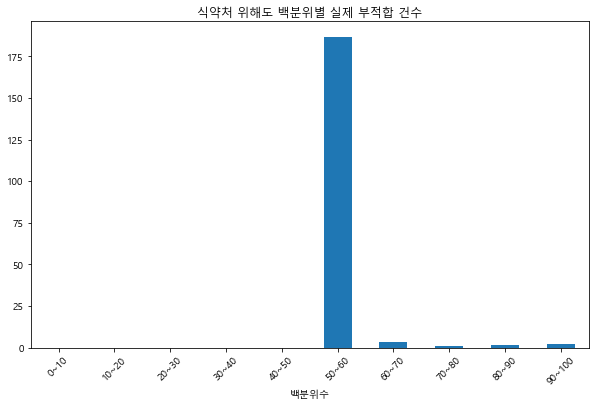

In [117]:
data['위험판정 정답률'].plot(kind='bar', rot=45)
plt.title('식약처 위해도 백분위별 실제 부적합 건수')

In [118]:
data.reset_index()

,백분위수,검사건수,부적합 건수,위험판정건수,위험판정 정답률
0,0~10,2409,0.0,0,NaN
1,10~20,1874,0.0,0,NaN
2,20~30,1995,2.0,0,inf
3,30~40,2073,4.0,0,inf
4,40~50,2092,7.0,0,inf
5,50~60,2085,28.0,15,186.67
6,60~70,2151,26.0,772,3.37
7,70~80,2020,18.0,2020,0.89
8,80~90,2081,32.0,2081,1.54
9,90~100,2082,44.0,2082,2.11


# <font color='red'> one shot one kill

In [119]:
sf['제품구분'].unique()

array(['가공식품', '농.임산물', '식품첨가물', '축산물', '건강기능식품', '수산물', '기구또는용기.포장'],
      dtype=object)

In [120]:
df = sf.copy()

가공식품
위해도점수 최대값 26.11

위해도점수 최소값 0.0


array([[13832,  6869],
       [   60,   101]], dtype=int64)

              precision    recall  f1-score   support

         0.0       1.00      0.67      0.80     20701
         1.0       0.01      0.63      0.03       161

    accuracy                           0.67     20862
   macro avg       0.51      0.65      0.41     20862
weighted avg       0.99      0.67      0.79     20862



<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

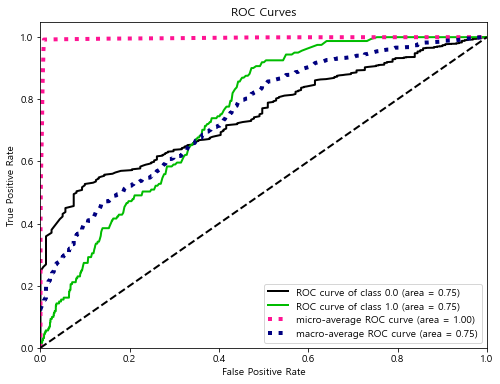

<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

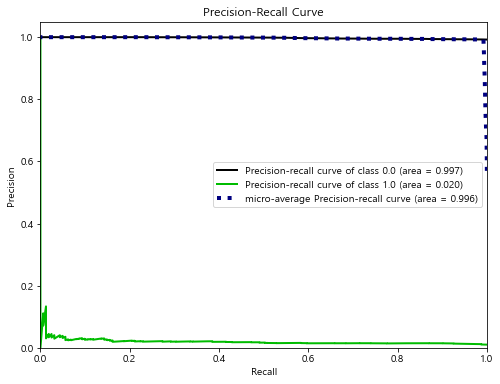

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

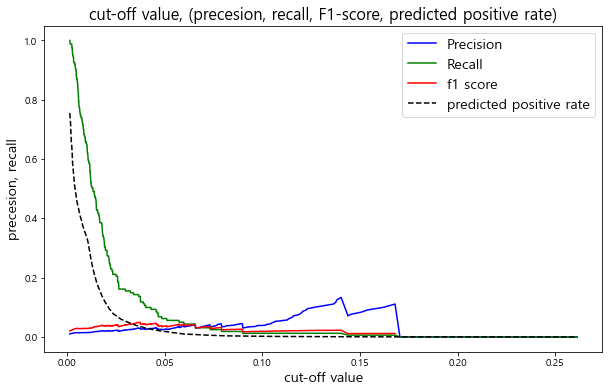

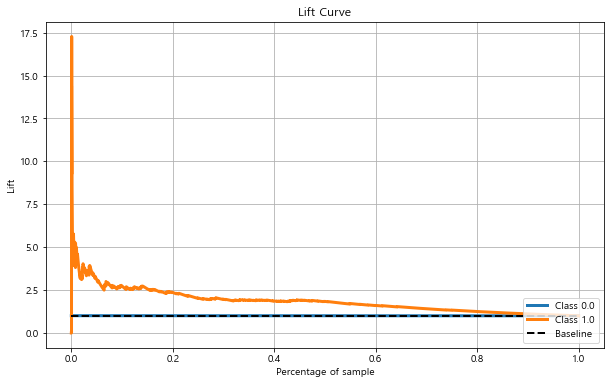

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

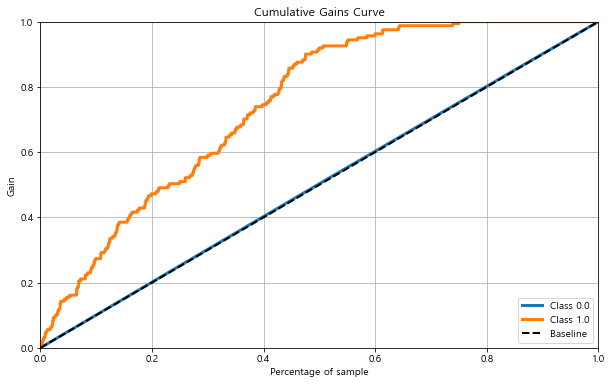

<AxesSubplot:title={'center':'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

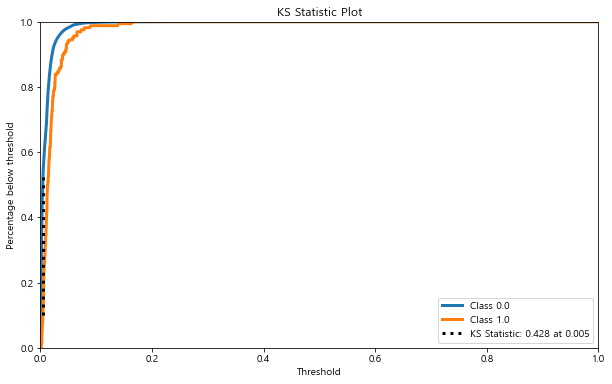

<AxesSubplot:title={'center':'Calibration plots (Reliability Curves)'}, xlabel='Mean predicted value', ylabel='Fraction of positives'>

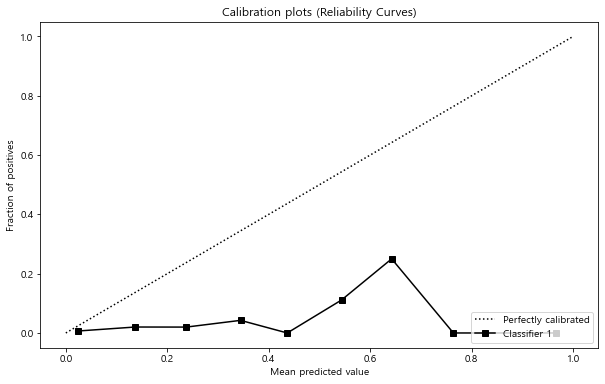

****************************************************************************************************
농.임산물
위해도점수 최대값 35.83

위해도점수 최소값 0.1


array([[2617,  713],
       [  16,    7]], dtype=int64)

              precision    recall  f1-score   support

         0.0       0.99      0.79      0.88      3330
         1.0       0.01      0.30      0.02        23

    accuracy                           0.78      3353
   macro avg       0.50      0.55      0.45      3353
weighted avg       0.99      0.78      0.87      3353



<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

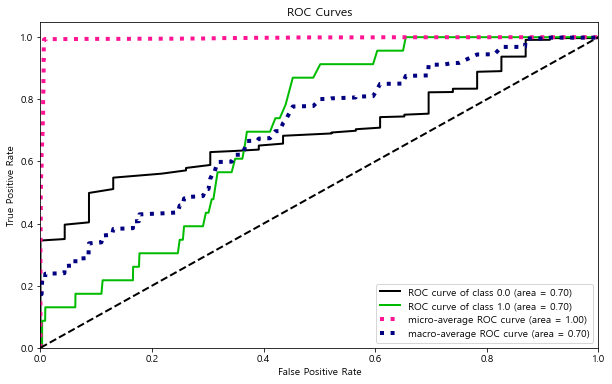

<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

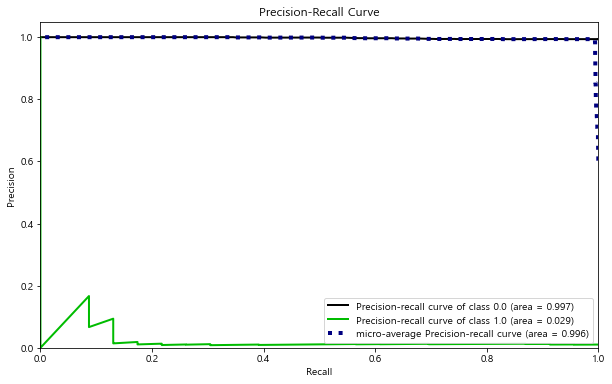

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

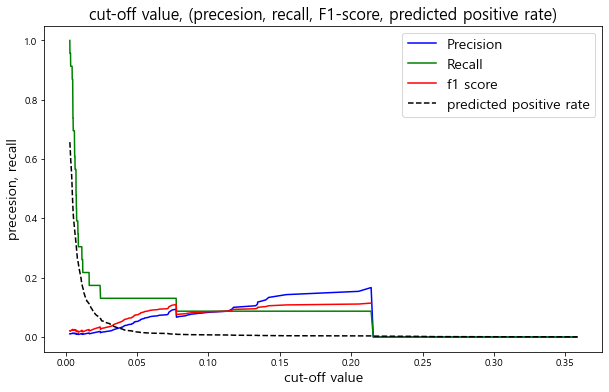

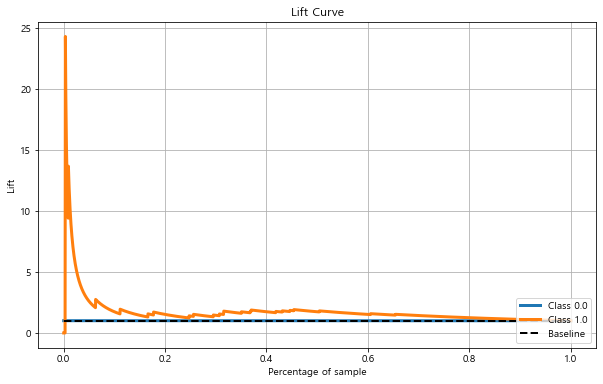

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

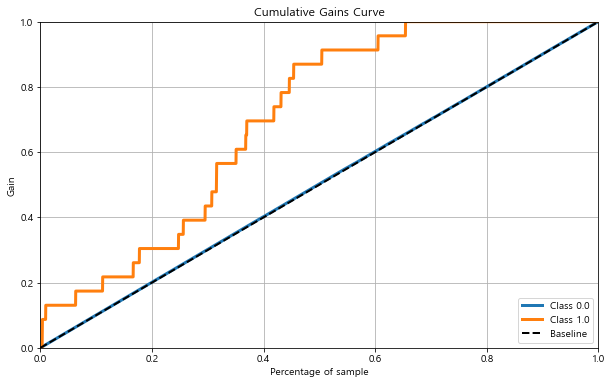

<AxesSubplot:title={'center':'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

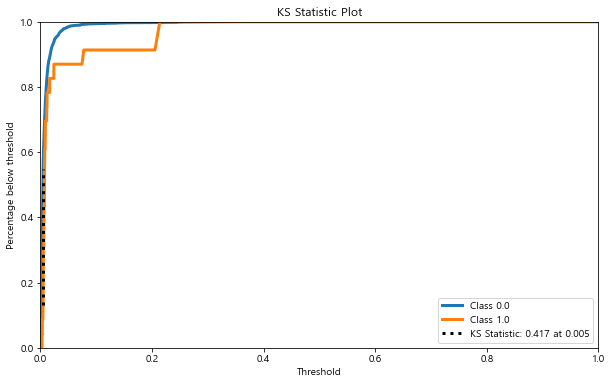

<AxesSubplot:title={'center':'Calibration plots (Reliability Curves)'}, xlabel='Mean predicted value', ylabel='Fraction of positives'>

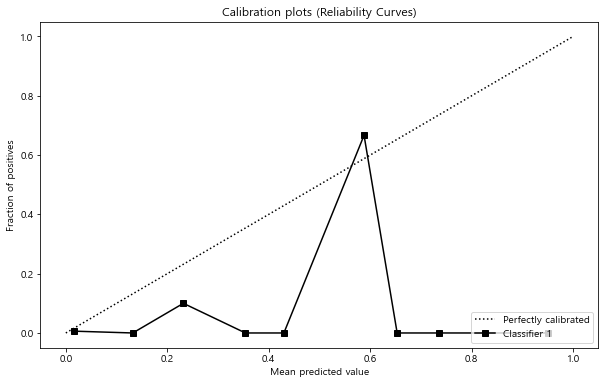

****************************************************************************************************
식품첨가물
위해도점수 최대값 15.37

위해도점수 최소값 0.01


array([[1818,   82],
       [   2,    1]], dtype=int64)

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98      1900
         1.0       0.01      0.33      0.02         3

    accuracy                           0.96      1903
   macro avg       0.51      0.65      0.50      1903
weighted avg       1.00      0.96      0.98      1903



<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

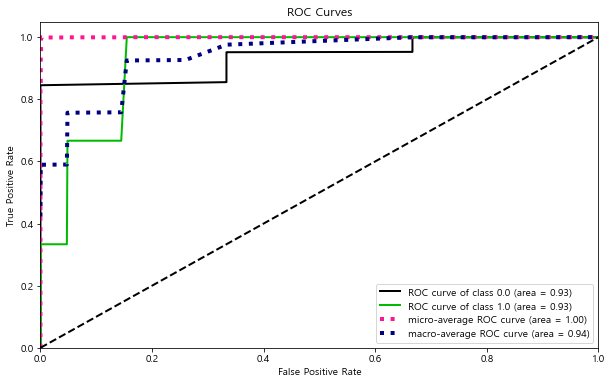

<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

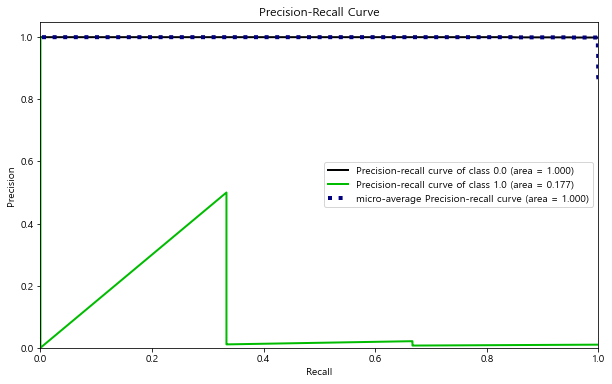

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

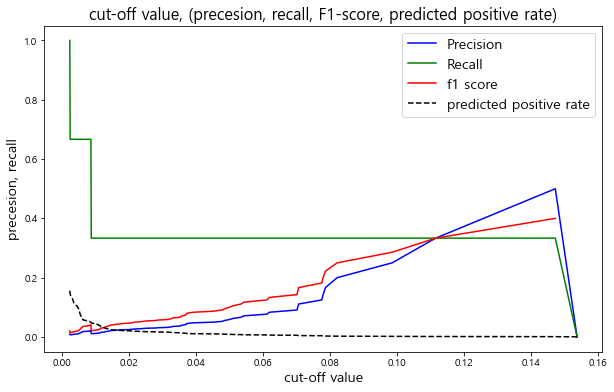

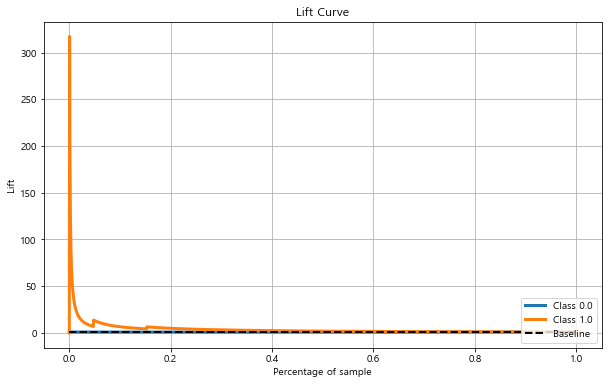

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

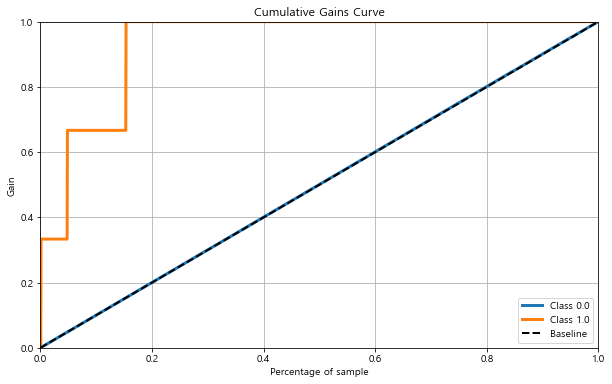

<AxesSubplot:title={'center':'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

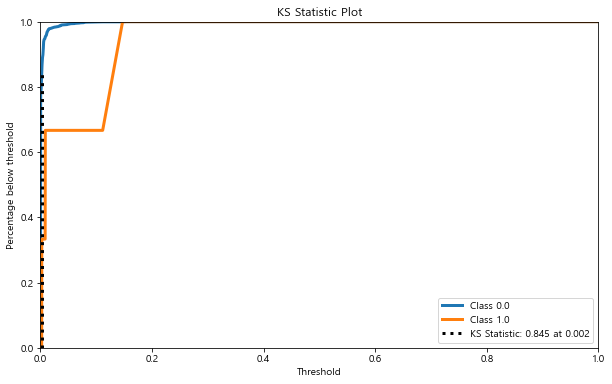

<AxesSubplot:title={'center':'Calibration plots (Reliability Curves)'}, xlabel='Mean predicted value', ylabel='Fraction of positives'>

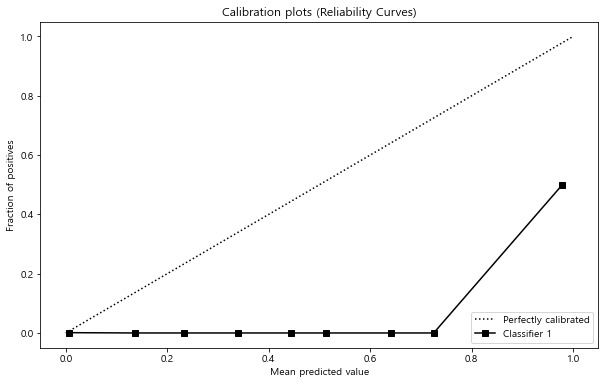

****************************************************************************************************
축산물
위해도점수 최대값 86.61

위해도점수 최소값 0.0


array([[ 311, 1797],
       [   1,   16]], dtype=int64)

              precision    recall  f1-score   support

         0.0       1.00      0.15      0.26      2108
         1.0       0.01      0.94      0.02        17

    accuracy                           0.15      2125
   macro avg       0.50      0.54      0.14      2125
weighted avg       0.99      0.15      0.26      2125



<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

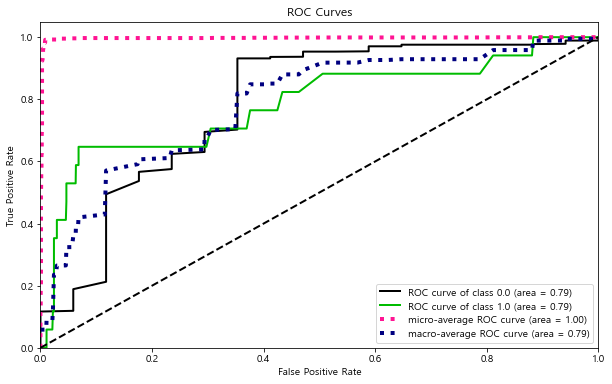

<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

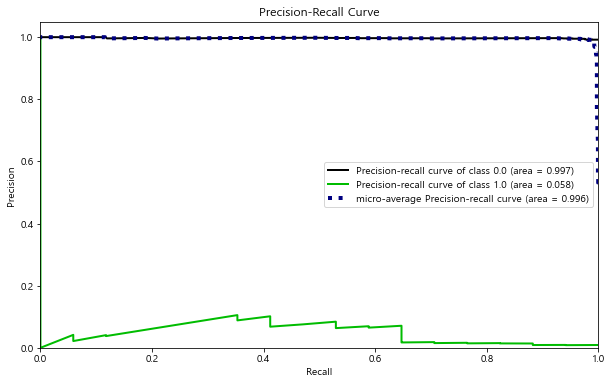

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

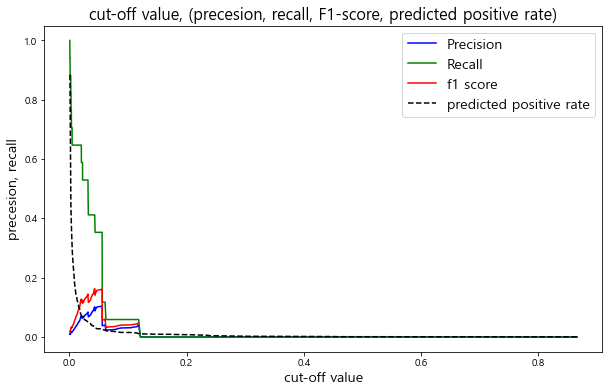

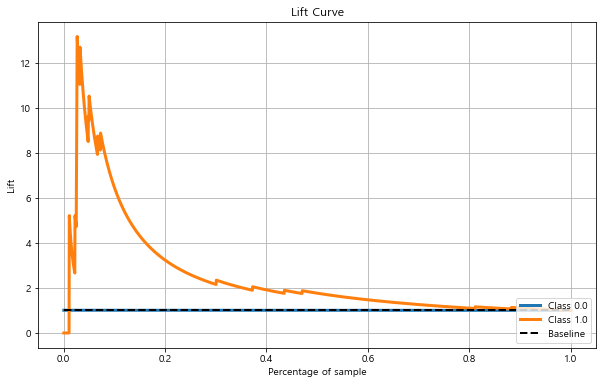

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

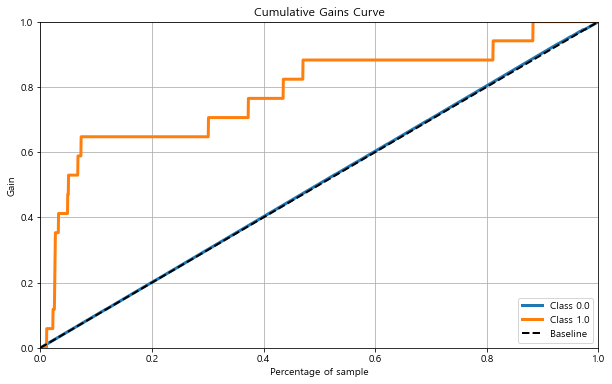

<AxesSubplot:title={'center':'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

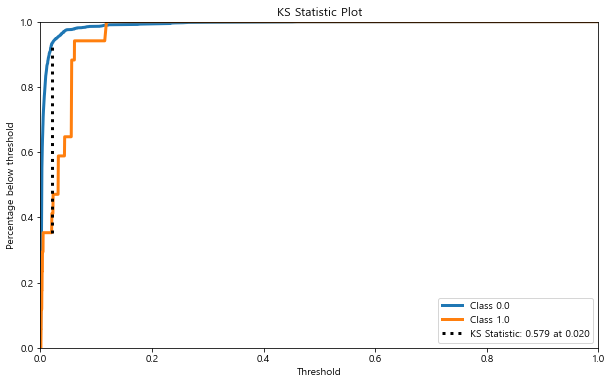

<AxesSubplot:title={'center':'Calibration plots (Reliability Curves)'}, xlabel='Mean predicted value', ylabel='Fraction of positives'>

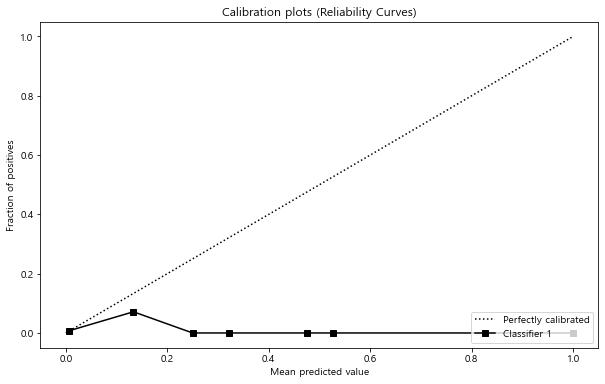

****************************************************************************************************
건강기능식품
위해도점수 최대값 18.9

위해도점수 최소값 0.18


array([[687, 417],
       [ 20,   9]], dtype=int64)

              precision    recall  f1-score   support

         0.0       0.97      0.62      0.76      1104
         1.0       0.02      0.31      0.04        29

    accuracy                           0.61      1133
   macro avg       0.50      0.47      0.40      1133
weighted avg       0.95      0.61      0.74      1133



<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

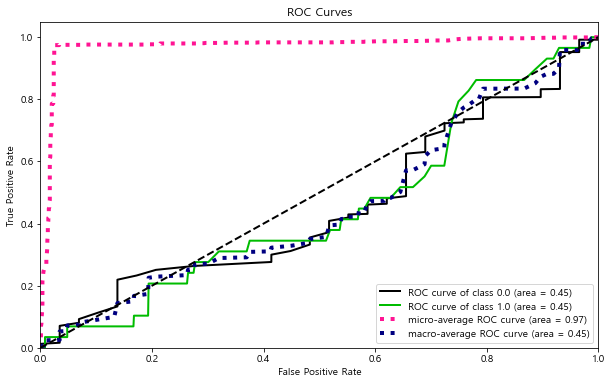

<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

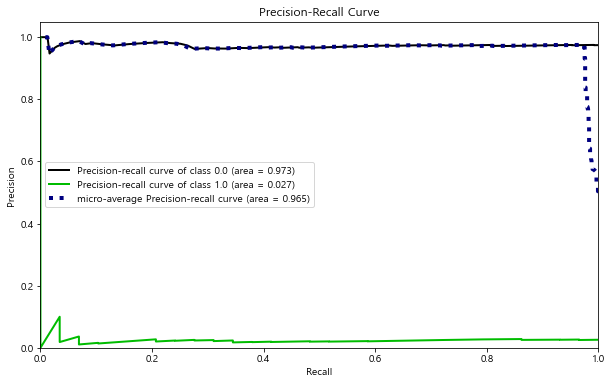

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

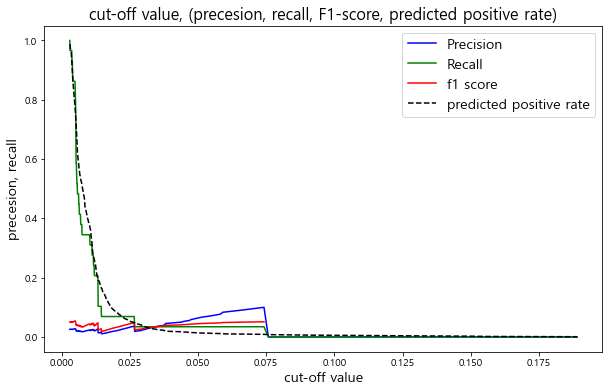

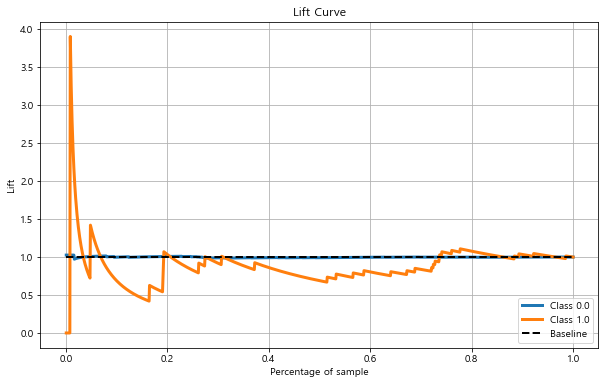

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

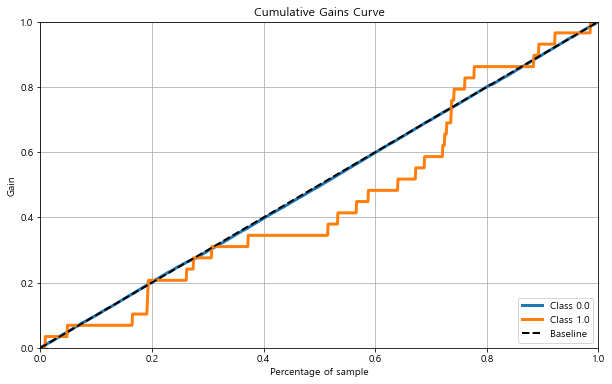

<AxesSubplot:title={'center':'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

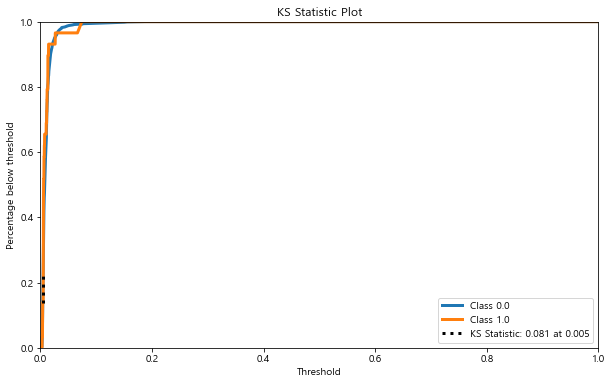

<AxesSubplot:title={'center':'Calibration plots (Reliability Curves)'}, xlabel='Mean predicted value', ylabel='Fraction of positives'>

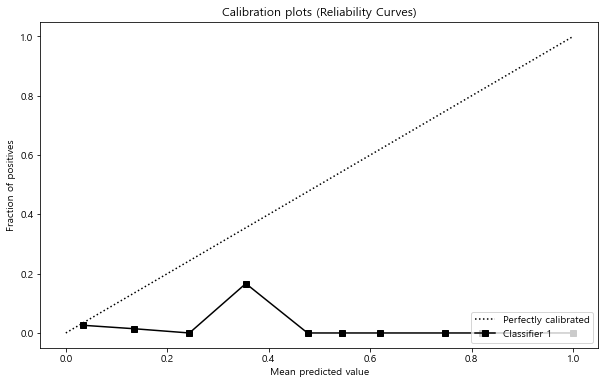

****************************************************************************************************
수산물
위해도점수 최대값 3.66

위해도점수 최소값 0.0


array([[1577, 2678],
       [   0,    8]], dtype=int64)

              precision    recall  f1-score   support

         0.0       1.00      0.37      0.54      4255
         1.0       0.00      1.00      0.01         8

    accuracy                           0.37      4263
   macro avg       0.50      0.69      0.27      4263
weighted avg       1.00      0.37      0.54      4263



<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

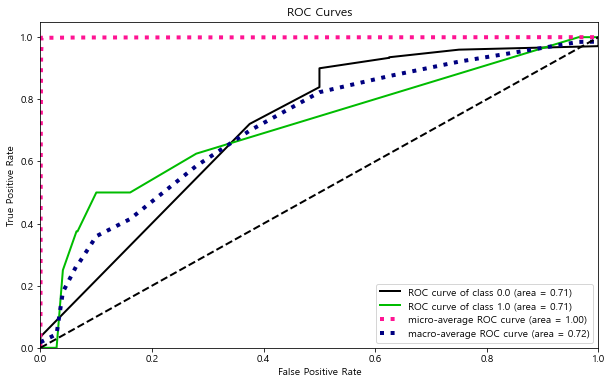

<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

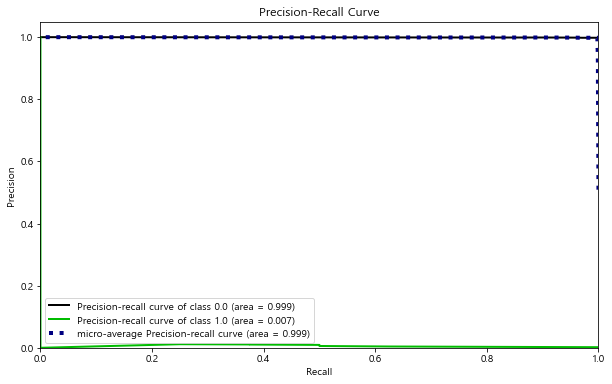

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

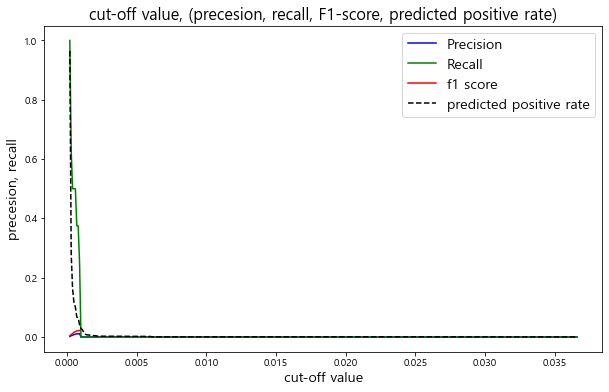

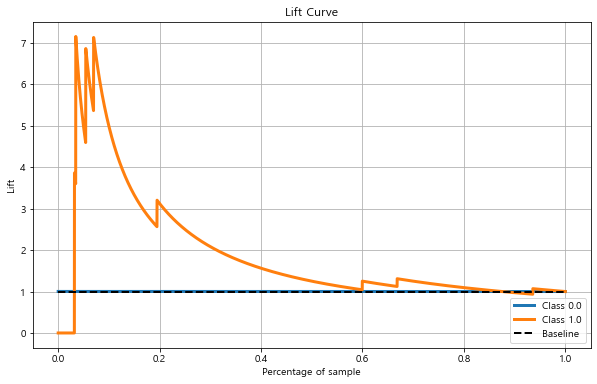

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

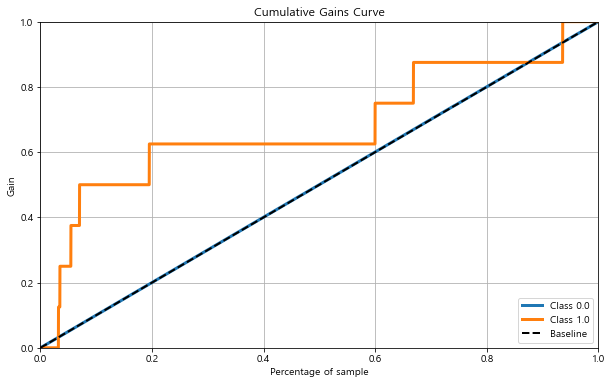

<AxesSubplot:title={'center':'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

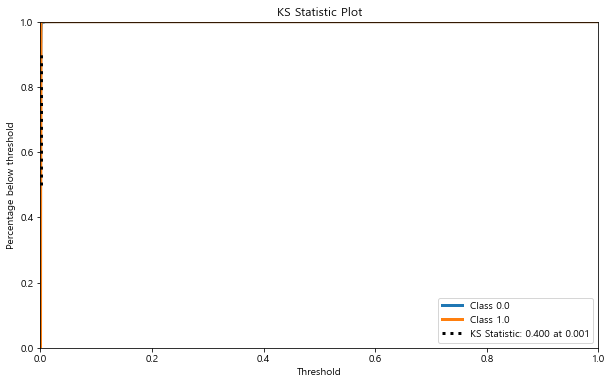

<AxesSubplot:title={'center':'Calibration plots (Reliability Curves)'}, xlabel='Mean predicted value', ylabel='Fraction of positives'>

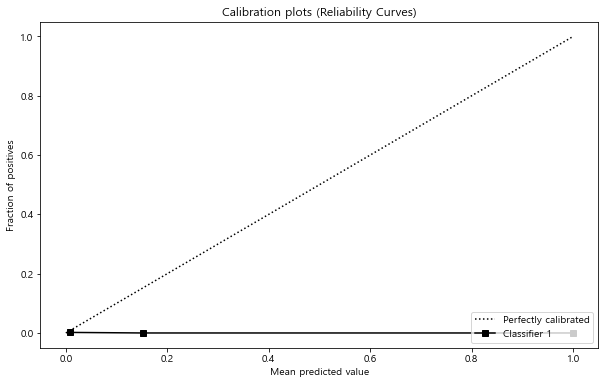

****************************************************************************************************
기구또는용기.포장
위해도점수 최대값 35.33

위해도점수 최소값 0.15


array([[1418, 1771],
       [  12,   53]], dtype=int64)

              precision    recall  f1-score   support

         0.0       0.99      0.44      0.61      3189
         1.0       0.03      0.82      0.06        65

    accuracy                           0.45      3254
   macro avg       0.51      0.63      0.34      3254
weighted avg       0.97      0.45      0.60      3254



<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

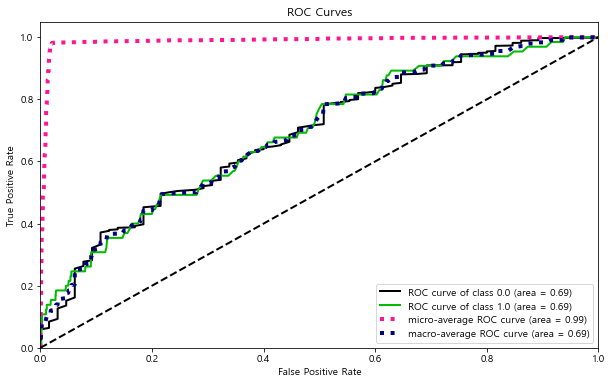

<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

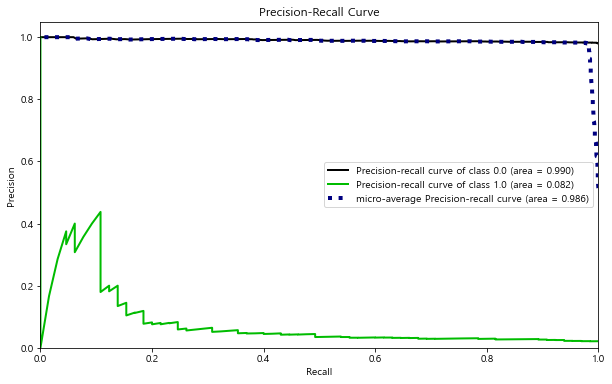

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

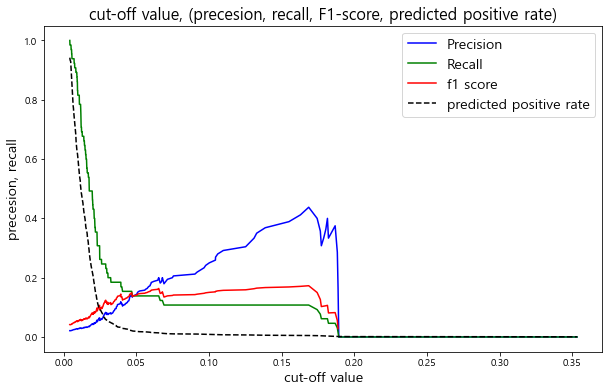

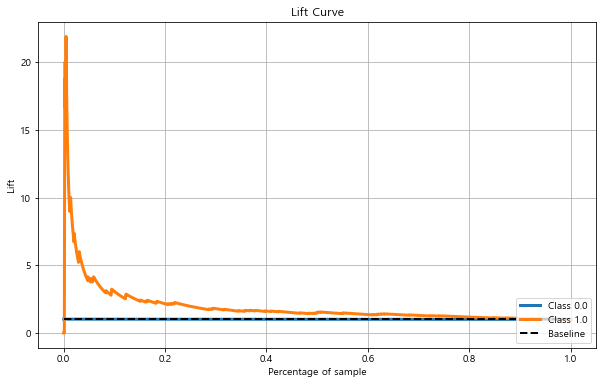

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

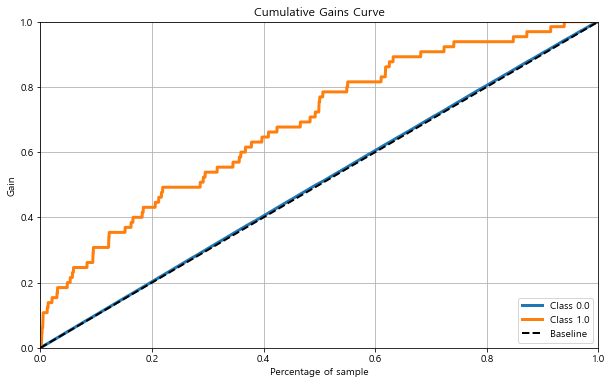

<AxesSubplot:title={'center':'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

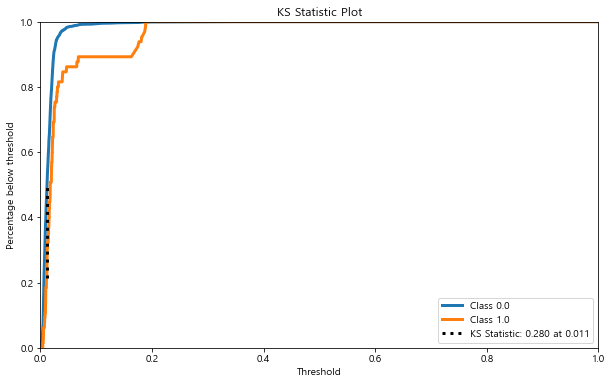

<AxesSubplot:title={'center':'Calibration plots (Reliability Curves)'}, xlabel='Mean predicted value', ylabel='Fraction of positives'>

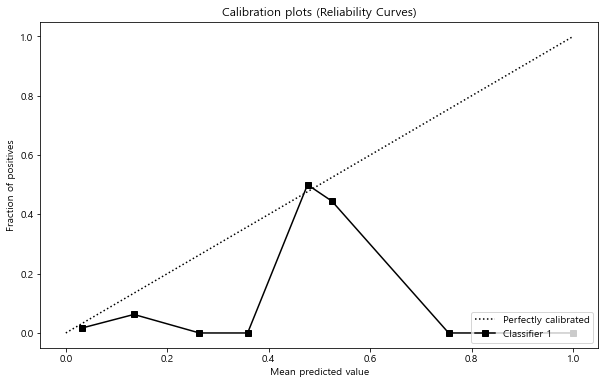

****************************************************************************************************


In [122]:
plt.rcParams["figure.figsize"] = (8,6)

results = {}

for col_name in sf['제품구분'].unique():
    df = sf.copy()
    print(col_name)
    
    df = df[df['제품구분'] == col_name]
    del df['제품구분']
    print(f'위해도점수 최대값 {df.위험점수.max()}\n')
    print(f'위해도점수 최소값 {df.위험점수.min()}')
    df['정상점수'] = 100 - df['위험점수']
    df['정상점수'] = df['정상점수']/100
    df['위험점수'] = df['위험점수']/100
    y_pred = df.위험판정
    y_true = df['판정결과']
    y_proba = np.c_[df.정상점수, df.위험점수]    
    
    confusion_matrix(y_true, y_pred)
    print(classification_report(y_true, y_pred))

    skplt.metrics.plot_roc(y_true, y_proba); plt.show()
    skplt.metrics.plot_precision_recall(y_true, y_proba); plt.show()
    
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_proba[:, 1])
    scores = [np.sum(to_labels(y_proba[:, 1], t))/len(y_proba[:, 1]) for t in thresholds]
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
    scores = [f1_score(y_true, to_labels(y_proba[:, 1], t)) for t in thresholds]
    ix = np.argmax(scores)    
    
    result = {
        'AUROC' : metrics.roc_auc_score(y_true, y_proba[:, 1]),
        'Average PR' : metrics.average_precision_score(y_true, y_proba[:, 1]),
        'cohen_kappa' : metrics.cohen_kappa_score(y_true, y_pred),
        'matthews_corrcoef' : metrics.matthews_corrcoef(y_true, y_pred),
        'balanced_accuracy_score' : metrics.balanced_accuracy_score(y_true, y_pred),
        'brier_score' : brier_score_loss(y_true, y_proba[:, 1]),
        'Maximum F-measure' : scores[ix],
        'at Threshold' : thresholds[ix],
    }
    
    results.update({col_name : result})

    skplt.metrics.plot_lift_curve(y_true, y_proba); plt.show()
    skplt.metrics.plot_cumulative_gain(y_true, y_proba); plt.show()
    skplt.metrics.plot_ks_statistic(y_true, y_proba); plt.show()
    skplt.metrics.plot_calibration_curve(y_true, [y_proba]); plt.show()
    
    print('*'*100)

In [123]:
round(pd.DataFrame(results).T, 2)

,AUROC,Average PR,cohen_kappa,matthews_corrcoef,balanced_accuracy_score,brier_score,Maximum F-measure,at Threshold
가공식품,0.75,0.02,0.01,0.05,0.65,0.01,0.05,0.04
농.임산물,0.70,0.03,0.01,0.02,0.55,0.01,0.11,0.21
식품첨가물,0.93,0.18,0.02,0.06,0.65,0.00,0.40,0.15
축산물,0.79,0.06,0.00,0.02,0.54,0.01,0.16,0.04
건강기능식품,0.45,0.03,-0.01,-0.02,0.47,0.03,0.05,0.00
수산물,0.71,0.01,0.00,0.03,0.69,0.00,0.02,0.00
기구또는용기.포장,0.69,0.08,0.02,0.07,0.63,0.02,0.17,0.17


# End